In [37]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics import calinski_harabasz_score

In [ ]:
#Exercici 1: 
#A. Descarrega el dataset adjunt, de registres de publicacions a Facebook sobre Tailàndia
#B. Tingues en compte que prèviament et caldrà preparar el dataset.
#C. Classifica els diferents registres utilitzant l'algorisme de K-means.


In [2]:
data = pd.read_csv('Publicacions Facebook Thailandia.csv')

In [3]:
data = data[['status_type', 'status_published', 'num_reactions', 'num_comments', 'num_shares']]  # selecciona solo estas columnas del conjunto de datos

In [7]:
data = data.rename(columns={'status_type': 'tipo_de_estado', 'status_published': 'publicado', 'num_reactions': 'reacciones', 'num_comments': 'comentarios', 'num_shares': 'compartidos'})  # cambia el nombre de las columnas

In [8]:
data = data.dropna()  # elimina filas con valores faltantes

In [9]:
data.to_csv('datos_manipulados.csv', index=False)  # guarda los datos manipulados en un nuevo archivo CSV

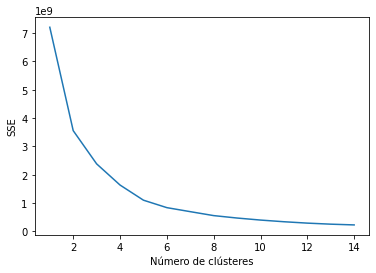

In [18]:
#Primero, antes de clasificar los registros con el método K-means, debo encontrar cuál es el número de clusters más adecuado,  esto lo hago con el método del codo,  donde uso  diferentes valores de k y se registra la variación de la suma de los cuadrados de las distancias de cada punto a su centroide más cercano (SSE) en función de k. Luego, se grafica esta relación y se busca el "codo" en la curva, que indica el punto donde la adición de más clústeres no aporta una mejora significativa en la SSE.
#En este caso, ejecuto el modelo KMeans para valores de k de 1 a 15, y se registra el SSE correspondiente para cada uno. Luego, se grafica la relación entre k y SSE para identificar el codo. En general, el número óptimo de clústeres es aquel que se encuentra en el punto del codo.
data = pd.read_csv('datos_manipulados.csv')

#Seleccionar las características
X = data[['reacciones', 'comentarios', 'compartidos']]

#Calcular SSE para diferentes valores de k
sse = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

#Visualizar los resultados
plt.plot(range(1, 15), sse)
plt.xlabel('Número de clústeres')
plt.ylabel('SSE')
plt.show()

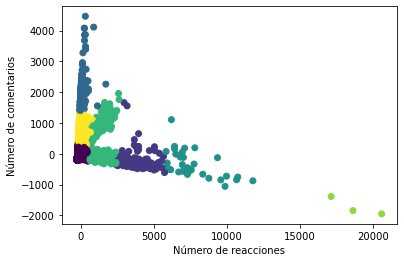

In [32]:
#C. Primero se realiza una reducción de dimensionalidad utilizando PCA y se seleccionan las dos primeras componentes principales para la visualización. En general se recomienda hacer una reducción de dimensionalidad antes de visualizar los resultados de un clustering. Una de las formas comunes de hacer esto es utilizando PCA.

# Seleccionar las características
X = data[['reacciones', 'comentarios', 'compartidos']]

# Reducción de dimensionalidad utilizando PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Elegir el número de clústeres
kmeans = KMeans(n_clusters=7)

# Entrenar el modelo
kmeans.fit(X_pca)

# Obtener las etiquetas de clúster
labels = kmeans.predict(X_pca)

# Visualizar los resultados
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.xlabel('Número de reacciones')
plt.ylabel('Número de comentarios')
plt.show()

In [27]:
#describir los clusters, especifiar por ejemplo para cada cluster la media aritmética y desviación típica de las variables numéricas
# Obtener las etiquetas de clúster
labels = kmeans.predict(X)

# Añadir las etiquetas de clúster al DataFrame
data['cluster'] = labels

# Calcular la media y desviación estándar de las variables numéricas para cada clúster
numeric_cols = ['reacciones', 'comentarios', 'compartidos']
cluster_stats = data.groupby('cluster')[numeric_cols].agg([np.mean, np.std])

print(cluster_stats)

          reacciones               comentarios              compartidos  \
                mean         std          mean          std        mean   
cluster                                                                   
0          88.108971  108.183876     41.803683   119.248439   12.564116   
1         709.878788  351.221241   7839.060606  1605.672833  669.606061   
2        2279.307692  527.208528     73.028846   168.127077   16.615385   
3         487.116114  488.610734   1336.661137   479.691361  309.919431   
4         970.506887  313.478174     67.972452   133.806714   19.052342   
5         428.490196  317.168061   4061.205882   865.622403  424.598039   
6         574.666667  128.332900  19135.666667  1796.144296  409.333333   

                     
                std  
cluster              
0         43.957900  
1        364.595747  
2         55.437706  
3        230.355025  
4         86.181134  
5        401.636362  
6        436.202170  


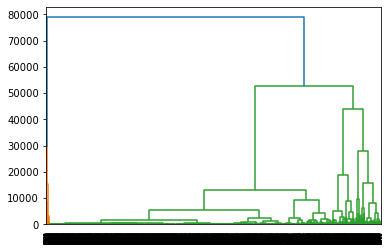

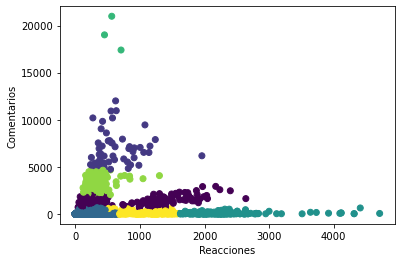

In [34]:
#Exercici2: Classifica els diferents registres utilitzant l'algorisme de clustering jeràrquic.
#1. Seleccionar las características
X = data[['reacciones', 'comentarios', 'compartidos']]
#2. Calcular la matriz de enlace
Z = linkage(X, 'ward')
#3. Visualizar el dendrograma
dendrogram(Z)
plt.show()
#4. Elegir el número de clústeres
model = AgglomerativeClustering(n_clusters=7, linkage='ward')
#5. Entrenar el modelo
model.fit(X)
#6. Obtener las etiquetas de clúster
labels = model.labels_
#7. Visualizar los resultados
plt.scatter(X['reacciones'], X['comentarios'], c=labels)
plt.xlabel('Reacciones')
plt.ylabel('Comentarios')
plt.show()

In [35]:
#Exercici3. Calcula el rendimiento del clustering mitjançant un paràmetre com pot ser silhouette.
score = silhouette_score(X, labels)
print("El coeficiente de silhouette es:", score)

#En general, un valor de silhouette cercano a 1 indica que los clústeres están bien separados, mientras que un valor cercano a 0 indica una superposición significativa entre los clústeres o que los registros podrían haber sido etiquetados incorrectamente.
#Por lo tanto, en este caso, el coeficiente de silhouette indica que el algoritmo de clustering ha funcionado bien en términos de separar los registros en clústeres distintos y coherentes.

El coeficiente de silhouette es: 0.7576216286328317


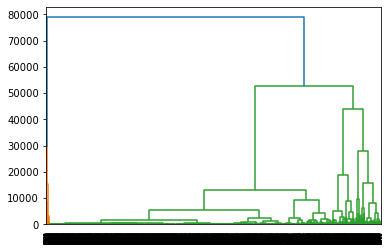

Calinski-Harabasz score: 5834.403994011811


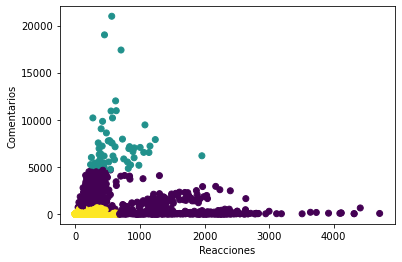

In [38]:
#from sklearn.metrics import calinski_harabasz_score

# Seleccionar las características
X = data[['reacciones', 'comentarios', 'compartidos']]

# Calcular la matriz de enlace
Z = linkage(X, 'ward')

# Visualizar el dendrograma
dendrogram(Z)
plt.show()

# Elegir el número de clústeres
model = AgglomerativeClustering(n_clusters=3, linkage='ward')

# Entrenar el modelo
model.fit(X)

# Obtener las etiquetas de clúster
labels = model.labels_

# Calcular el score de Calinski-Harabasz
score = calinski_harabasz_score(X, labels)
print("Calinski-Harabasz score:", score)

# Visualizar los resultados
plt.scatter(X['reacciones'], X['comentarios'], c=labels)
plt.xlabel('Reacciones')
plt.ylabel('Comentarios')
plt.show()

In [ ]:
#Interpretación: Un puntaje Calinski-Harabasz alto significa que la partición de los datos es más clara y coherente, lo que implica una mejor calidad del agrupamiento. En otras palabras, significa que los grupos están más bien definidos y separados entre sí. En el ejemplo dado, un puntaje de 5834.403994011811 sugiere que la partición de los datos en grupos fue de alta calidad y que los grupos están bien definidos y separados entre sí.